### 카카오톡 대화 EDA
- 1. 카카오 '[이름]'의 빈도수와 차트 작성
   막대 또는 원차트

- 2. 오전, 오후 빈도수 계산 및 차트 작성

- 3. [이름]별 오전, 오후 빈도수 계산 및 차트 작성

- 4. [이름] 자료의 한문장의 글자수 계산

- 5. 카톡량과 총글자량 데이터프레임으로 제작



In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import re

f=open('c:/py_data/2ka.txt',encoding='utf-8')
text=f.readlines()
print(text)


    

['고동원, 장정환, 한인석, 한경닷컴IT교육센터, 용우중, ... 님과 카카오톡 대화\n', '저장한 날짜 : 2021-04-05 13:59:38\n', '\n', '--------------- 2020년 12월 28일 월요일 ---------------\n', '한경닷컴IT교육센터님이 이동열님, 이동열님, ❤️すみれ님, 이동열님, ❤️すみれ님, 석님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 유상근님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 유상근님, 방성일님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 유상근님, 방성일님, 최성민님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 유상근님, 방성일님, 최성민님, 한동훈님, 이동열님, ❤️すみれ님, 석님, 임혜민님, 박도준님, 용우중님, 한인석님, 엄주상님, Moon님, 정재현님, 선미님, 유상근님, 방성일님, 최성민님, 한동훈님, 박예영님, 이동열님, ❤️すみれ님, 석님, 

In [51]:
#대화 빈도수 계산
user_cnt=dict()
for i in range(5,len(text)):
    user=text[i].split(']')[0]
    if user[0]!='[':
        pass
    else:
        user_name=user.split('[')[1]
    user_cnt[user_name]=user_cnt.get(user_name,0)+1
    keys=sorted(user_cnt.keys())

for key in keys:
    print(key+':'+str(user_cnt[key]))


    
    
    
    


Moon:1
❤️すみれ:4
고동원:2
박도준:11
박예영:1
방성일:23
부성순:24
서정동 강사님:94
석:21
선미:1
엄주상:10
용우중:21
유상근:5
이동열:1
임다솔:13
임혜민:5
장정환:23
정재현:6
최성민:6
최성준:16
한경닷컴IT교육센터:60
한동훈:1
한인석:1


In [58]:
df_users=pd.DataFrame(list(user_cnt.items()),columns=['이름','대화 빈도수'])
display(df_users)

,이름,대화 빈도수
0,한경닷컴IT교육센터,60
1,서정동 강사님,94
2,석,21
3,정재현,6
4,용우중,21
5,방성일,23
6,❤️すみれ,4
7,최성민,6
8,박도준,11
9,임다솔,13


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)


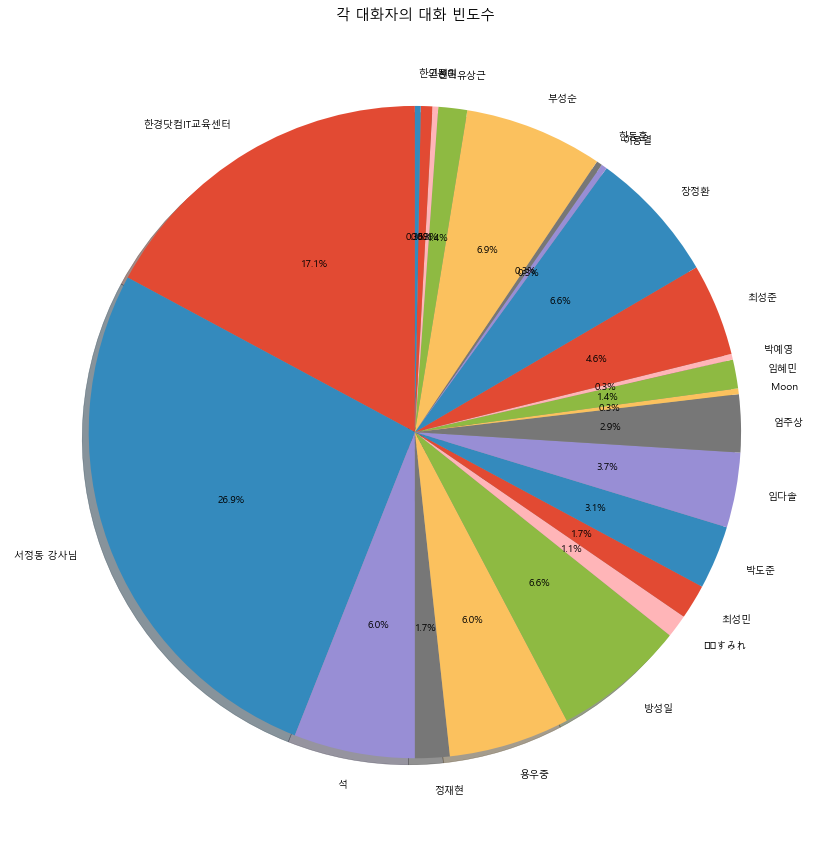

In [69]:
# 파이차트 그리기

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import style

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
style.use('ggplot')
plt.figure(figsize=(15,15))
plt.title('각 대화자의 대화 빈도수')
plt.pie(df_users['대화 빈도수'],labels=df_users['이름'],autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()